In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
x = df.iloc[:,0:1] 
y = df.iloc[:,-1]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=2)

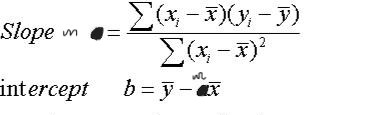

In [6]:
X_train.shape[0]

160

In [7]:
X_train.iloc[0] # xi---->First value of CGPA

cgpa    7.14
Name: 137, dtype: float64

In [8]:
X_train.iloc[0] - X_train.mean() #(xi - x̄)---> first value of CGPA - by mean of CGPA Column

cgpa    0.150062
dtype: float64

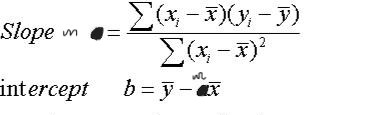

In [10]:
def fit(X_train, y_train):
   
    #For Slope (m)
    
    numerator = 0
    denomirator = 0
    
    for i in range(X_train.shape[0]):#160 values so loop has to be run 160 times
        numerator += (X_train.iloc[i] - X_train.mean()) * (y_train.iloc[i] - y_train.mean()) # ∑(xi - x̄)(yi -  ȳ)
        denomirator += (X_train.iloc[i] - X_train.mean()) * (X_train.iloc[i] - X_train.mean()) #∑(xi - x̄)*(xi - x̄)
        
    m = numerator/denomirator    
    
    #For Intercept (b)
    
    b = y_train.mean() - (m * X_train.mean())

    return m.values, b.values

In [11]:
fit(X_train, y_train)

(array([0.55795197]), array([-0.89611192]))

In [12]:
#For Prediction
def predict(X_train):
        
    #y = mx + b---> Line formula
    m, b = fit(X_train, y_train)
    y = [(m * X_train.iloc[i] + b).values for i in range(X_train.shape[0])]


    return y

In [13]:
predict(X_train)

[array([3.08766517]),
 array([4.0863992]),
 array([2.12798777]),
 array([1.94944314]),
 array([3.43917491]),
 array([2.87564342]),
 array([2.94817717]),
 array([2.83100726]),
 array([3.51728819]),
 array([3.50612915]),
 array([3.96364977]),
 array([3.53960627]),
 array([2.79195062]),
 array([2.59666743]),
 array([2.74731446]),
 array([2.68593975]),
 array([1.95502266]),
 array([2.5018156]),
 array([2.97049525]),
 array([3.03186997]),
 array([2.4181228]),
 array([2.47949752]),
 array([2.35674808]),
 array([2.42370232]),
 array([4.29842095]),
 array([2.21726009]),
 array([3.50054963]),
 array([2.52413367]),
 array([3.43359539]),
 array([1.80995515]),
 array([2.55761079]),
 array([3.90227505]),
 array([2.49065656]),
 array([3.10998325]),
 array([1.96060218]),
 array([3.22715316]),
 array([3.70699186]),
 array([3.72373042]),
 array([3.08208565]),
 array([3.20483508]),
 array([2.26189625]),
 array([2.4460204]),
 array([3.57308338]),
 array([3.08766517]),
 array([2.64130359]),
 array([2.9481

In [14]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


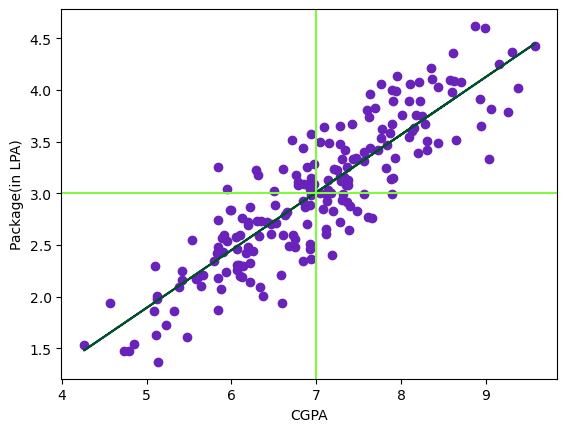

In [15]:
plt.scatter(df["cgpa"],df["package"], color = "#6922ba", label="Actual")
plt.xlabel("CGPA")
plt.ylabel("Package(in LPA)")#LPA means Lac Per Annum
plt.plot(X_train,predict(X_train), color= "#024f2e" )
plt.axvline(7, color = "#80fa3e")
plt.axhline(3, color = "#80fa3e")

plt.show()